What is Naive Bayes algorithm? 

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

## Bayes Theorem:

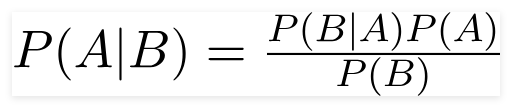

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.
Conclusion

Naive Bayes algorithms are mostly used in sentiment analysis, spam filtering, recommendation systems etc. 

They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. In most of the real life cases, the predictors are dependent, this hinders the performance of the classifier.

## Importing Library

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Loading Data

In [30]:
data = pd.read_csv(r"Naive Bayes\study_data.csv")

**A little bit of data exploration**

In [31]:
data.head(10)

,repetition_time,study_time,knowledge_level
0,0.00,0.00,Low
1,0.24,0.90,High
2,0.25,0.33,Low
3,0.65,0.30,High
4,0.98,0.24,Low
5,0.10,0.66,High
6,0.29,0.56,High
7,0.40,0.01,Low
8,0.72,0.25,Low
9,0.20,0.85,High


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repetition_time  258 non-null    float64
 1   study_time       258 non-null    float64
 2   knowledge_level  258 non-null    object 
dtypes: float64(2), object(1)
memory usage: 5.1+ KB


#### Counting unique values

In [33]:
data['knowledge_level'].unique()

array(['Low', 'High'], dtype=object)

In [34]:
data['knowledge_level'].value_counts()

High    151
Low     107
Name: knowledge_level, dtype: int64

#### Splitting data

In [35]:
# training dataset and labels
x = data.drop(data.columns[[2]], axis = 1)
y = data['knowledge_level']

In [36]:
x.head()

,repetition_time,study_time
0,0.00,0.00
1,0.24,0.90
2,0.25,0.33
3,0.65,0.30
4,0.98,0.24


In [37]:
y.head()

0     Low
1    High
2     Low
3    High
4     Low
Name: knowledge_level, dtype: object

In [38]:
y = pd.get_dummies(data, columns=['knowledge_level'])

In [39]:
y.head()

,repetition_time,study_time,knowledge_level_High,knowledge_level_Low
0,0.00,0.00,0,1
1,0.24,0.90,1,0
2,0.25,0.33,0,1
3,0.65,0.30,1,0
4,0.98,0.24,0,1


In [40]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y['knowledge_level_High'], test_size = 0.25, random_state =0)

# input is x
# output is y['knowledge_level_High']

## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

# <font color = "green">Gaussian NB</font>

### Training model

In [42]:
# using sklearn library
# fitting the Naive Base Model

from sklearn.naive_bayes import GaussianNB

naivebayes_classifier = GaussianNB()

naivebayes_classifier.fit(xtrain, ytrain)

GaussianNB()

### Predicting Test_input

In [43]:
y_pred = naivebayes_classifier.predict(xtest)

### Results

In [44]:
# Building confusion MAtrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

In [45]:
cm

array([[29,  0],
       [ 4, 32]], dtype=int64)

In [46]:
# finding accuracy

#So, NaiveBay's is classifying this datasets with the probability of 93.8%

from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_pred)

0.9384615384615385

# Visualising the model performance

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


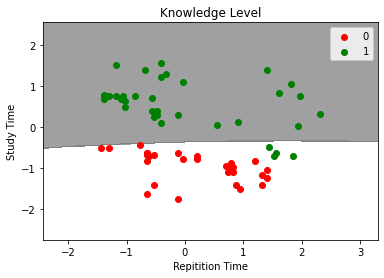

In [47]:
#plotting the hyperplane using matplotlib
# meshgrid returns the coordinated matrix from a coordinated vector. It is 
#basically used to create rectangular grid out of given the two one 
# dimentional array. Finally, we will be finding out coordinated matrices

from matplotlib.colors import ListedColormap

X_set, y_set = xtest, ytest

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, naivebayes_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'grey')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Knowledge Level')
plt.xlabel('Repitition Time')
plt.ylabel('Study Time')
plt.legend()
plt.show()